Original article: https://www.forbes.com/sites/niallmccarthy/2017/10/30/the-worlds-top-cities-for-sustainable-public-transport-infographic/#61e080453c1e

### Load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('sustainable mobility.xlsx')

df.head()

,City,Sustainable Cities Mobility Index
0,Hong Kong,0.653
1,Zurich,0.650
2,Paris,0.645
3,Seoul,0.644
4,Prague,0.643


### Create Country feature

In [3]:
from geopy import geocoders

gn = geocoders.GoogleV3(timeout=5)

In [4]:
df = df[~df['City'].str.contains('Undisclosed')] #Drop undisclosed cities

In [5]:
len(df)

92

In [6]:
gn.geocode("Hong Kong")[0].split(',')[-1]

'Hong Kong'

In [7]:
df['Country'] = df['City'].apply(lambda city: gn.geocode(city)[0].split(',')[-1].strip())

### Final submission

In [8]:
sns.set(style="whitegrid")

__Top 15 Cities__

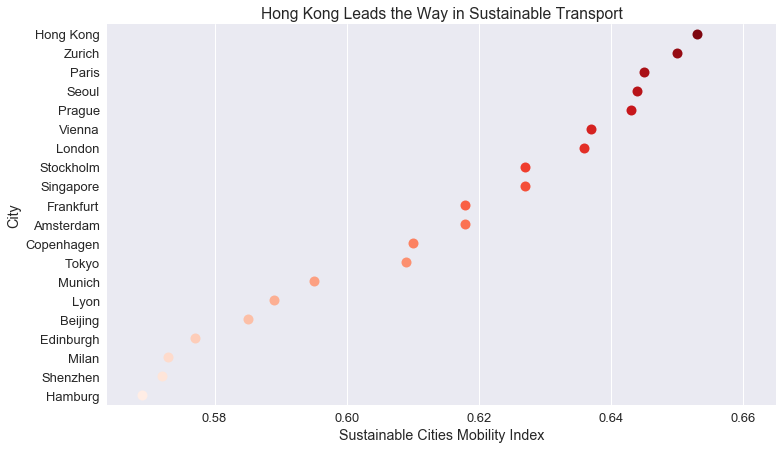

In [9]:
sns_plot = plt.figure(figsize=(12,7))
sns.set(font_scale=1.3)
sns.stripplot(x='Sustainable Cities Mobility Index',y='City', size=10,data=df.head(20),palette="Reds_r")
plt.title('Hong Kong Leads the Way in Sustainable Transport')
sns_plot.savefig("Sustainable Transport.png");

__Runner up: City scores grouped by country__

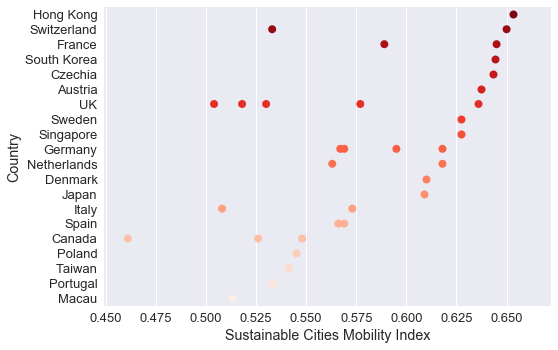

In [10]:
top_countries = df.groupby('Country').mean().sort_values(by='Sustainable Cities Mobility Index',ascending=False).head(20).index

top_countries_df = df[df['Country'].isin(top_countries)]

sns.stripplot(x='Sustainable Cities Mobility Index',y='Country', size=8,data=top_countries_df,palette="Reds_r", edgecolor="gray")
sns.despine(left=True, bottom=True)

### Previous iterations and graphs

__Simple bar chart of top 10 cities__

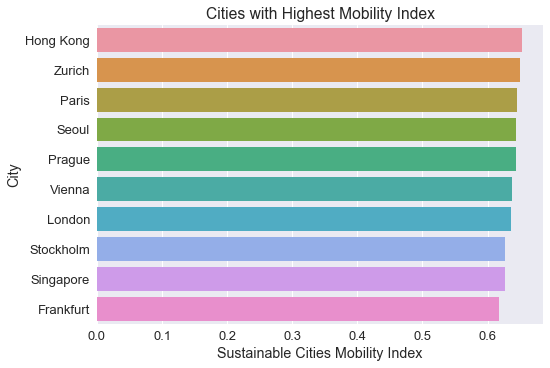

In [11]:
#plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
sns.barplot(y='City',x='Sustainable Cities Mobility Index',data=df.head(10))
plt.title("Cities with Highest Mobility Index")
plt.xlabel('Sustainable Cities Mobility Index');

__Strip plot of all cities__

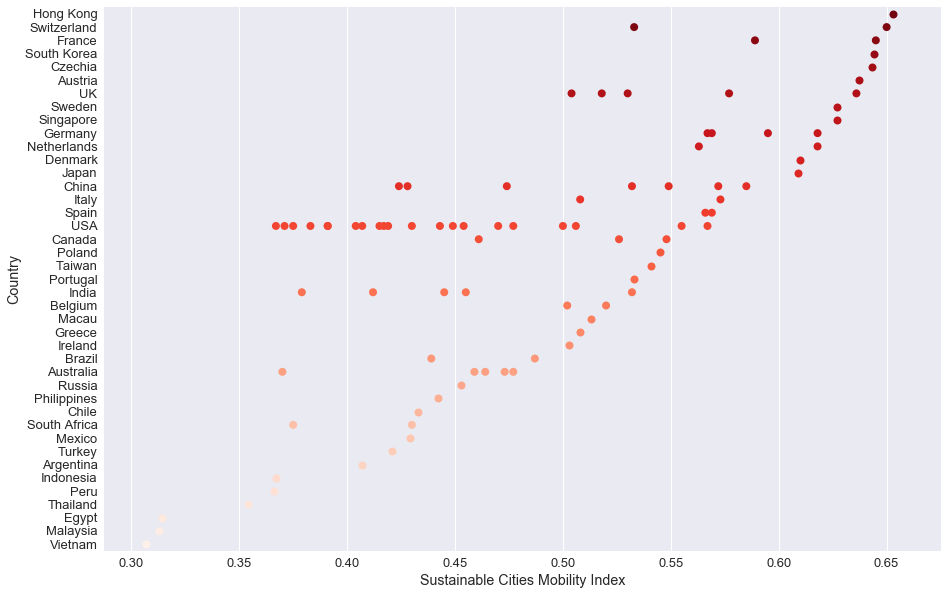

In [12]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Sustainable Cities Mobility Index',y='Country', size=8,data=df,palette="Reds_r", edgecolor="gray")
sns.despine(left=True, bottom=True)

__Box plot of countries and mobility index__

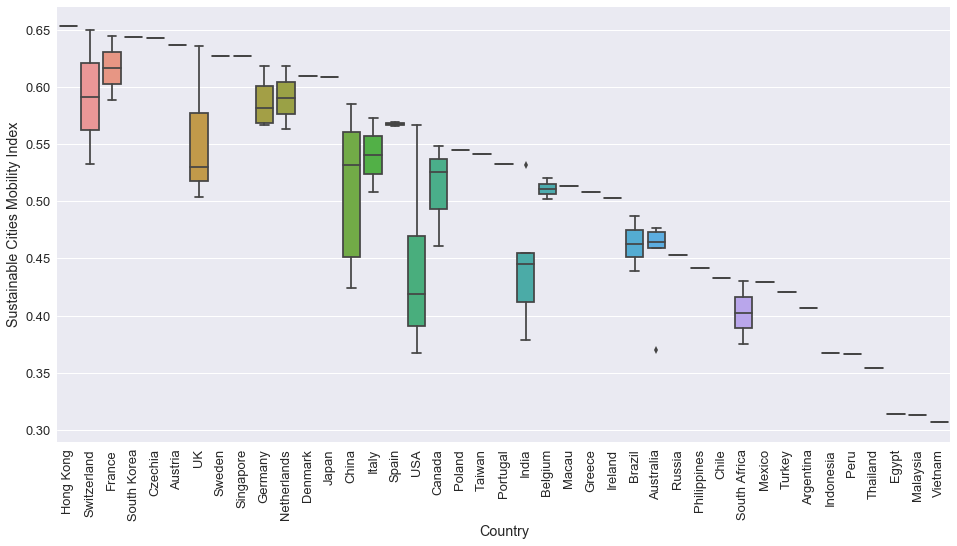

In [13]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(x='Country',y='Sustainable Cities Mobility Index',data=df)

__Top 10 cities with country legend__

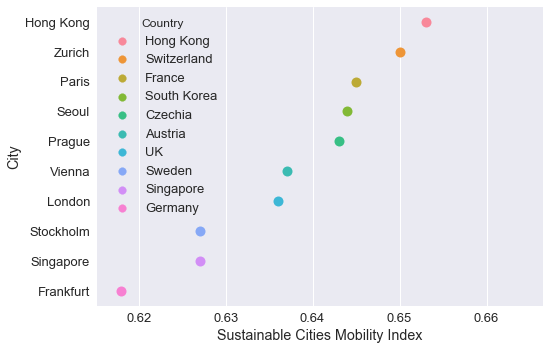

In [14]:
sns.stripplot(x='Sustainable Cities Mobility Index',y='City', hue='Country',size=10,data=df.head(10), edgecolor="gray")
sns.despine(left=True, bottom=True)